<!DOCTYPE html>
<html>
<body>

<h1 style="text-align: center; font-family: Times New Roman; margin-bottom: 0;">M<span style="font-size: x-large;">AGNETIC</span> M<span style="font-size: x-large;">ETHODS</span> L<span style="font-size: x-large;">AB</span> (GPC522)</h1>

<h2 style="text-align: center; font-family: Times New Roman; margin-top: 0;"><sup style="font-size: larger;">PRACTICAL - II</sup> </h2>

<h3 style="text-align: center; font-family: Times New Roman; margin-top: 0;"><sup style="font-size: larger; font-weight: bold;">Gridding Techniques</br> (Interpolation Techniques)</sup> </h3>

<h4 style="text-align: center; font-family: 'Courier New'; margin-bottom: 0;">January 15, 2024</h4>
<h4 style="text-align: center; font-family: 'Courier New'; margin-bottom: 0;">Name: Riya Singh Rathore</h4>
<h4 style="text-align: center; font-family: 'Courier New';">Admission Number: 20JE0801</h4>
<h4 style="text-align: center; font-family: 'Times New Roman';">Visit: <a href="https://github.com/RiyaSinghRathore/Magnetic-Methods";">https://github.com/RiyaSinghRathore/Magnetic-Methods</a> for the Lab Repository</h4>
</body>
</html>


### <span style="font-family: Times New Roman;"> Objective:</span>
#### <span style="font-family: Times New Roman;"> For the given data, use the various interpolation techniques for gridding and write your observations. </span>

#### <span style="font-family: Times New Roman;"> Theory: </span>

1. **Kriging Interpolation**:
   - **Theory**: Kriging predicts values at unsampled locations by considering spatial correlation among sampled points. It aims to minimize estimation variance by assigning weights to nearby points based on their spatial relationship.
   - **Observations**: Kriging tends to produce the most accurate results, particularly when spatial correlation is present. It's computationally intensive but offers superior interpolation quality.

2. **Nearest-Neighbor Interpolation**:
   - **Theory**: Nearest-neighbor interpolation assigns the value of the nearest sampled point to each unsampled location. It's a simple and fast method that doesn't consider spatial trends or patterns.
   - **Observations**: Nearest-neighbor interpolation is quick and easy to implement but may result in discontinuous surfaces with sharp transitions between neighboring points.

3. **Radial Average Interpolation**:
   - **Theory**: Radial average interpolation calculates the average value of sampled points within a certain radius around each unsampled location. It smooths the data by averaging nearby points.
   - **Observations**: Radial average interpolation provides a smoothed surface but may oversmooth the data, leading to loss of fine-scale details.

4. **Triangulation with Linear Interpolation**:
   - **Theory**: Triangulation divides the region into triangles using sampled points as vertices. Linear interpolation estimates values at unsampled locations by interpolating within each triangle using values at its vertices.
   - **Observations**: Triangulation with linear interpolation strikes a balance between accuracy and simplicity. It produces smooth surfaces while preserving some spatial variations but may not capture complex trends as effectively as kriging.

### <span style="font-family: Times New Roman;"> Code:</span>

In [1]:
# Importing Libraries
import numpy as np

from scipy.interpolate import griddata, Rbf, NearestNDInterpolator
from scipy.spatial import Delaunay

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker

import pandas as pd

In [2]:
# Load data
data = np.loadtxt("Data/Topography_practical_1.txt", skiprows=1)
X = data[:, 0]
Y = data[:, 1]
Z = data[:, 2]

# DataFrame
df=pd.DataFrame({"X": X, "Y": Y, "Z":Z})
df

,X,Y,Z
0,78.0083,15.9965,291.0
1,78.0250,15.9965,285.0
2,78.0417,15.9965,281.0
3,78.0583,15.9965,273.0
4,78.0750,15.9965,267.0
...,...,...,...
15120,79.9417,14.0003,21.0
15121,79.9583,14.0003,19.0
15122,79.9750,14.0003,17.0
15123,79.9917,14.0003,17.0


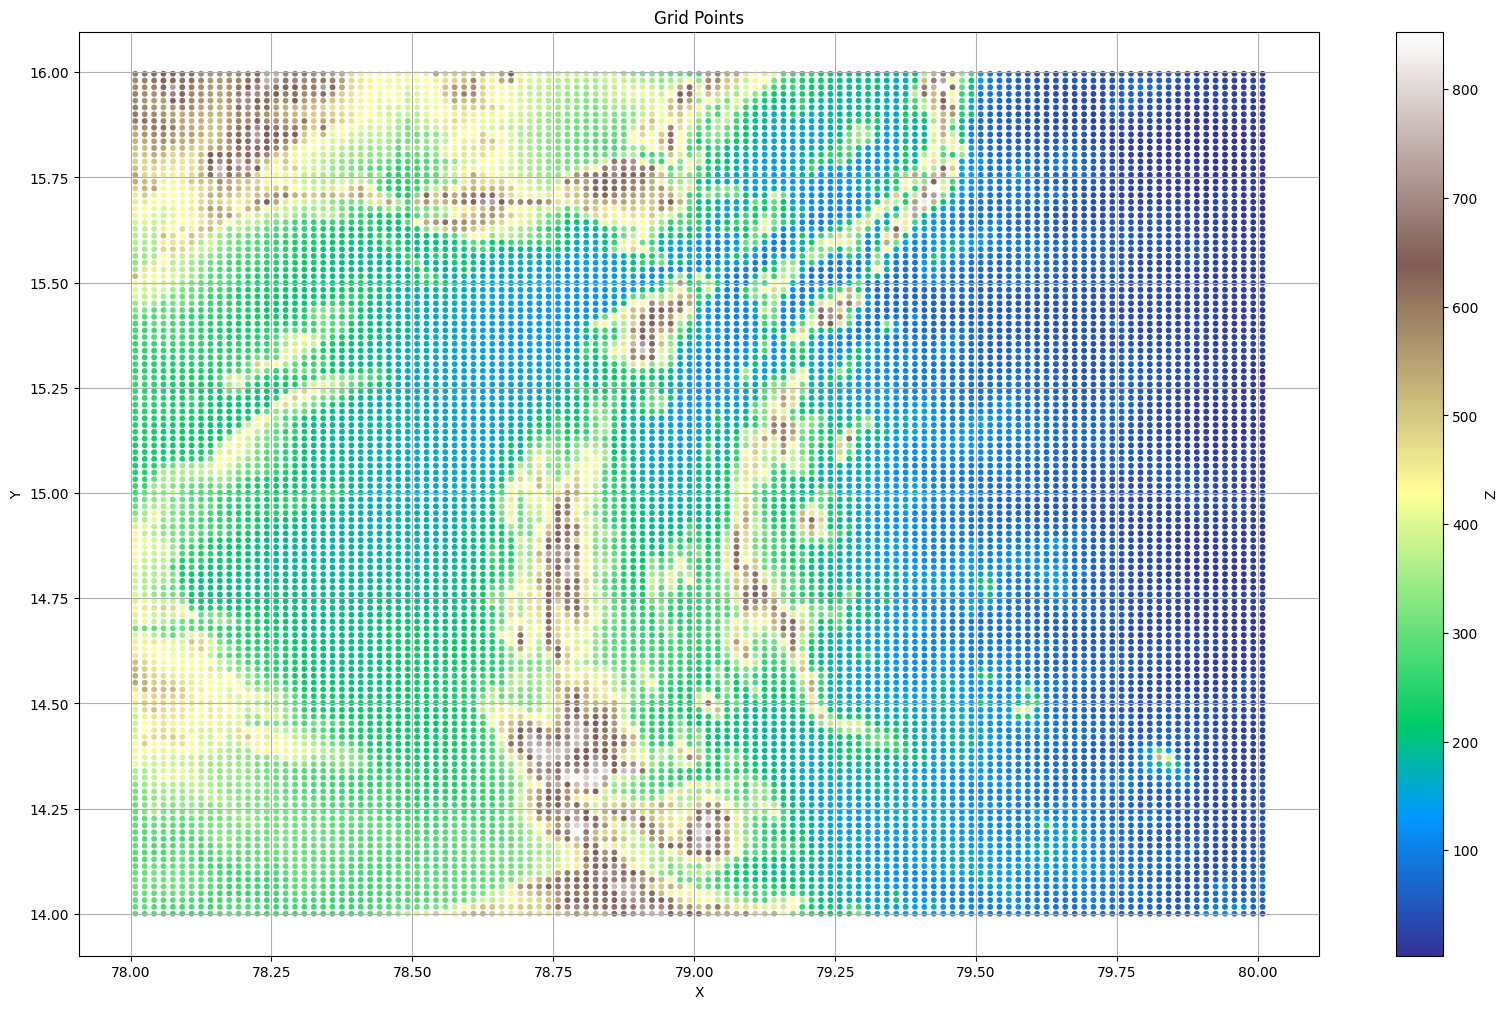

In [3]:
grid_X, grid_Y = np.meshgrid(np.unique(X), np.unique(Y))
fig = plt.figure(figsize=(20, 12))
plt.scatter(grid_X.flatten(), grid_Y.flatten(), c=Z.flatten(), cmap="terrain", s=10)
plt.colorbar(label='Z')
plt.title('Grid Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

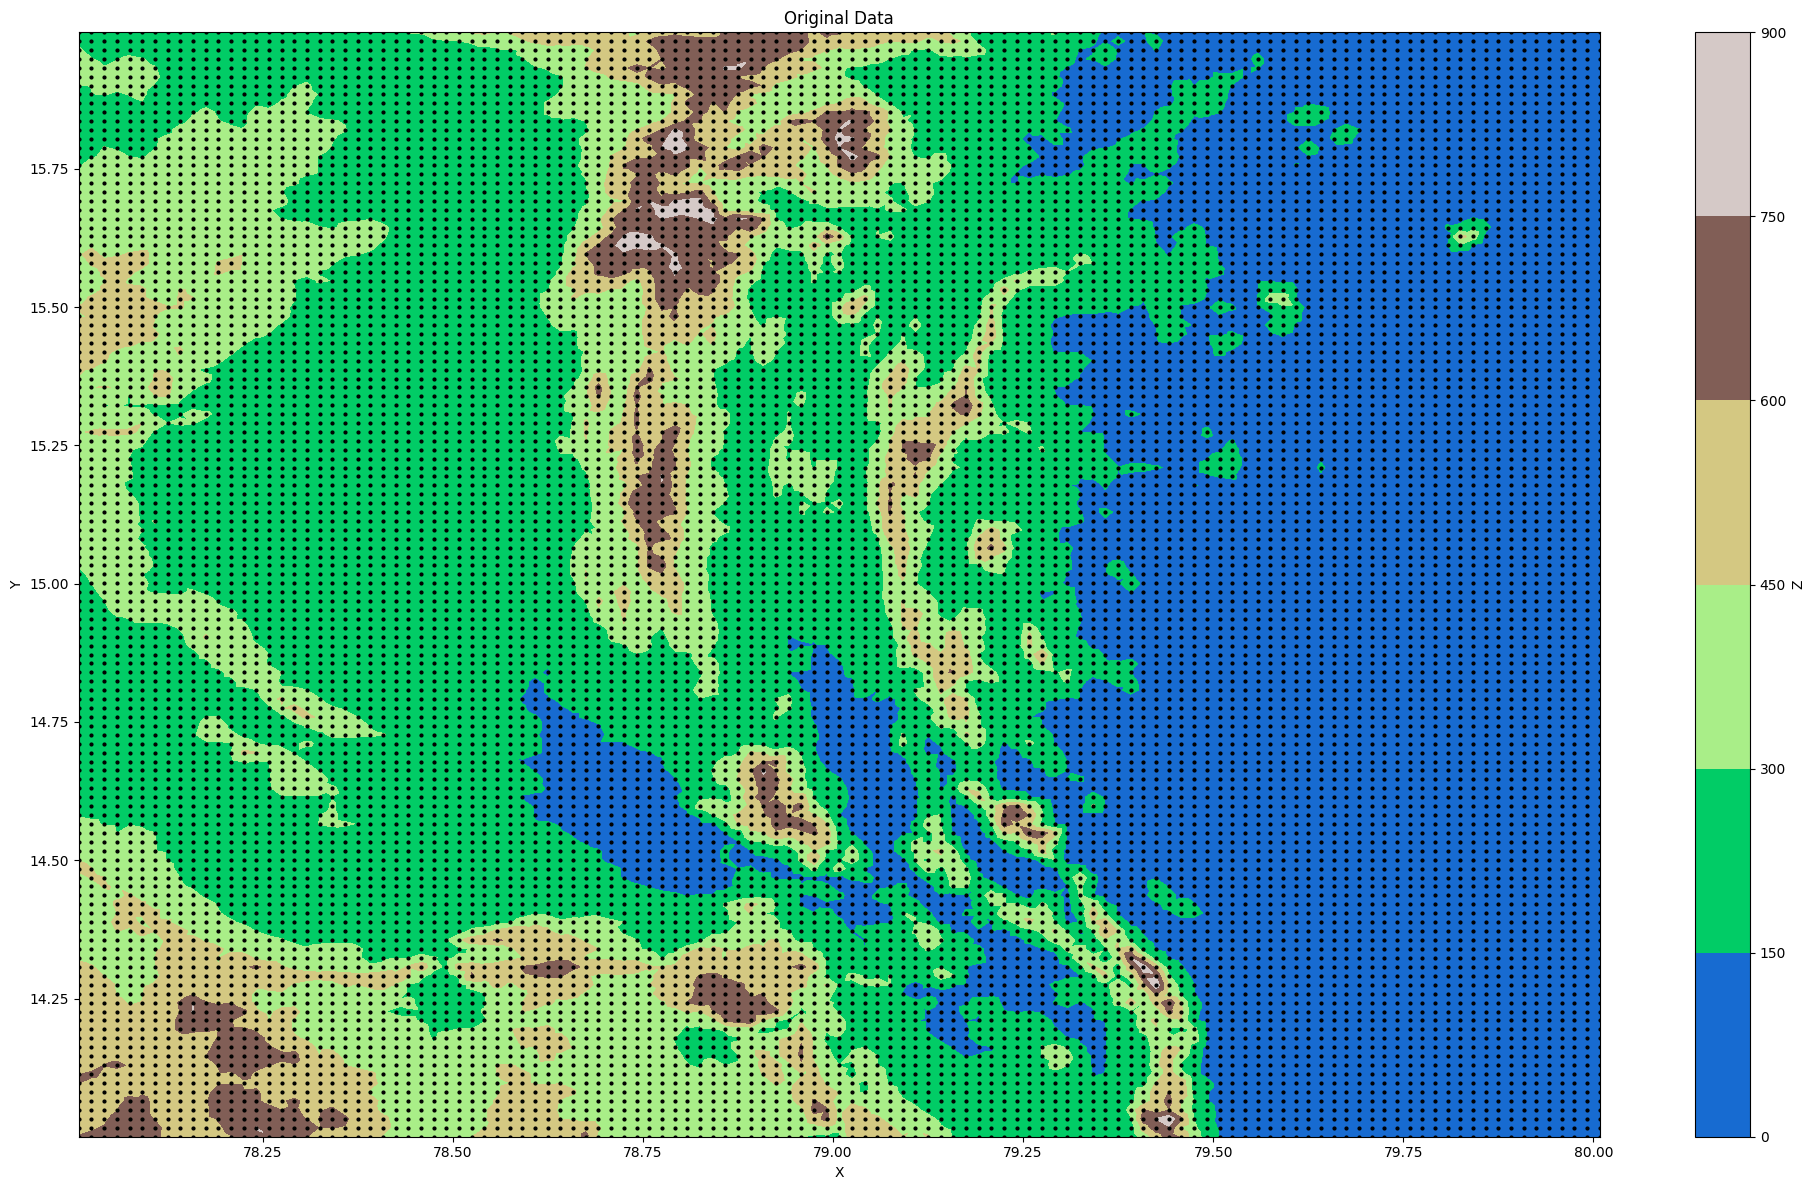

In [4]:
plt.figure(figsize=(20, 12))
plt.tricontourf(X, Y, Z, cmap='terrain')
plt.colorbar(label='Z')
plt.scatter(X, Y, color='k', s=4)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

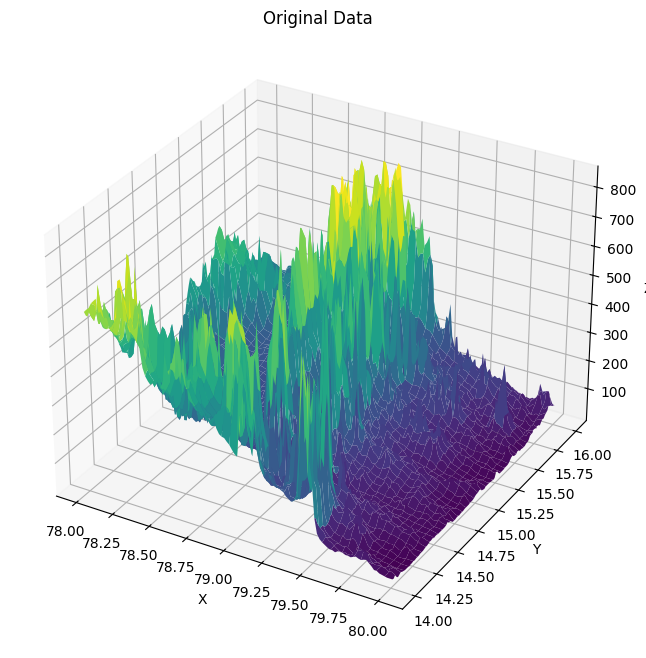

<Figure size 640x480 with 0 Axes>

In [5]:
def plot_3d_contour(X, Y, grid_X, grid_Y, grid_Z, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(grid_X, grid_Y, grid_Z, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

plot_3d_contour(X, Y, grid_X, grid_Y, griddata((X, Y), Z, (grid_X, grid_Y), method='linear'), 'Original Data')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Y')

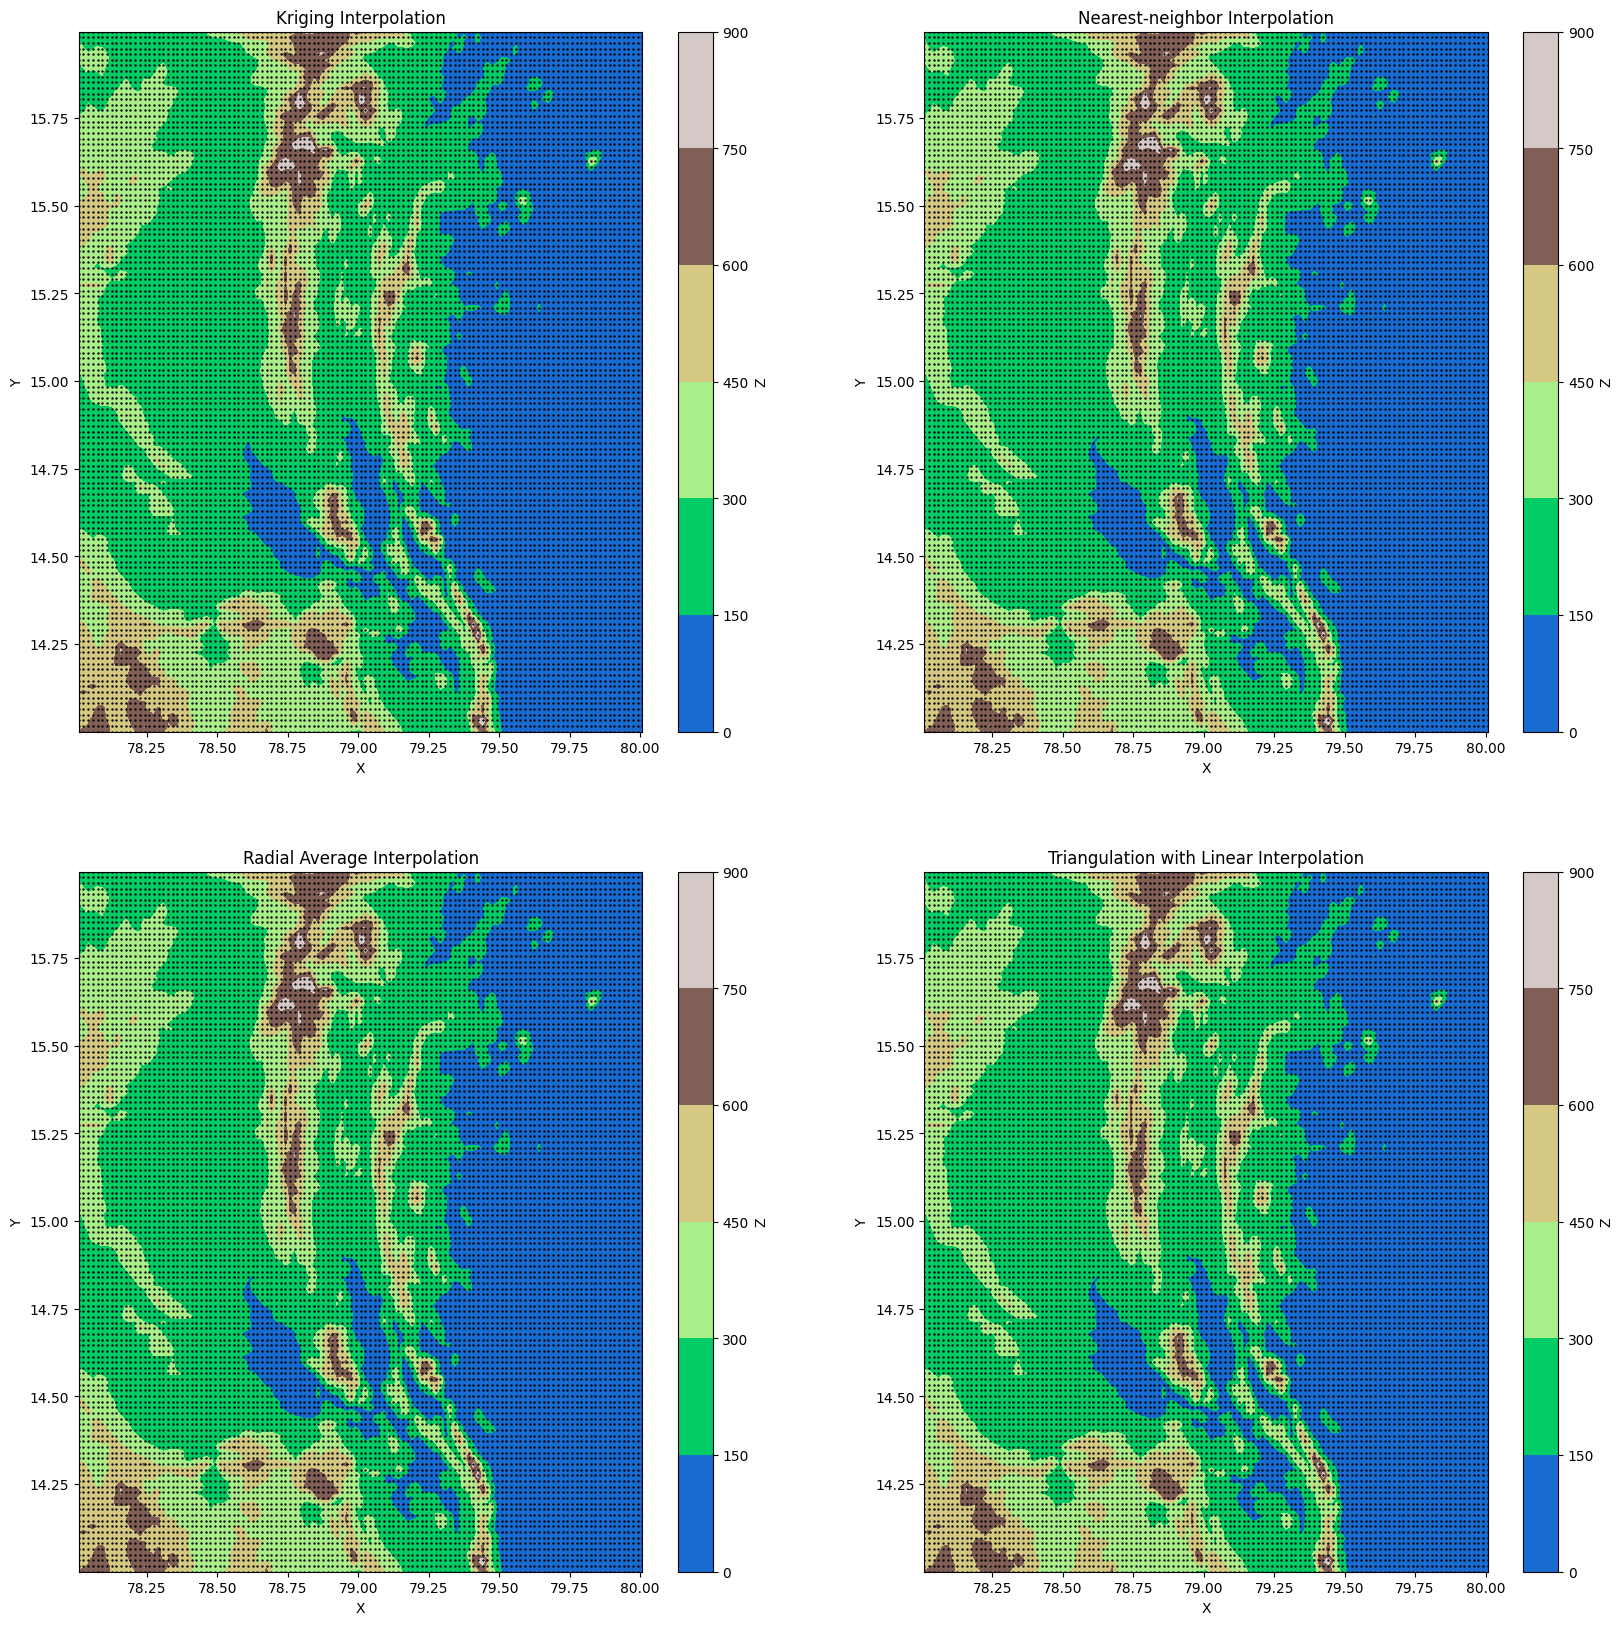

In [6]:
fig = plt.figure(figsize=(20, 20))

# Subplot 1: Kriging Interpolation
plt.subplot(2, 2, 1)
rbf_kriging = Rbf(X, Y, Z, function='gaussian')
grid_Z_kriging = rbf_kriging(grid_X, grid_Y)
plt.contourf(grid_X, grid_Y, grid_Z_kriging, cmap='terrain')
plt.colorbar(label='Z')
plt.scatter(X, Y, color='k', s=0.5)
plt.title('Kriging Interpolation')
plt.xlabel('X')
plt.ylabel('Y')

# Subplot 2: Nearest-neighbor Interpolation
plt.subplot(2, 2, 2)
grid_Z_nearest = griddata((X, Y), Z, (grid_X, grid_Y), method='nearest')
plt.contourf(grid_X, grid_Y, grid_Z_nearest, cmap='terrain')
plt.colorbar(label='Z')
plt.scatter(X, Y, color='k', s=0.5)
plt.title('Nearest-neighbor Interpolation')
plt.xlabel('X')
plt.ylabel('Y')

# Subplot 3: Radial Average Interpolation
plt.subplot(2, 2, 3)
triangulation = Delaunay(np.column_stack((X, Y)))
interp_rbf = Rbf(X, Y, Z, function='linear')
grid_Z_radial = interp_rbf(grid_X, grid_Y)
plt.contourf(grid_X, grid_Y, grid_Z_radial, cmap='terrain')
plt.colorbar(label='Z')
plt.scatter(X, Y, color='k', s=0.5)
plt.title('Radial Average Interpolation')
plt.xlabel('X')
plt.ylabel('Y')

# Subplot 4: Triangulation with Linear Interpolation
plt.subplot(2, 2, 4)
interp_triang = NearestNDInterpolator(triangulation, Z)
grid_Z_triang = interp_triang(np.column_stack((grid_X.flatten(), grid_Y.flatten())))
grid_Z_triang = grid_Z_triang.reshape(grid_X.shape)
plt.contourf(grid_X, grid_Y, grid_Z_triang, cmap='terrain')
plt.colorbar(label='Z')
plt.scatter(X, Y, color='k', s=0.5)
plt.title('Triangulation with Linear Interpolation')
plt.xlabel('X')
plt.ylabel('Y')

In [7]:
def plot_error(X, Y, grid_X, grid_Y, grid_Z, method):
    original_Z = griddata((X, Y), Z, (grid_X, grid_Y), method='linear')
    error = np.abs(original_Z - grid_Z)
    plt.figure(figsize=(8, 6))
    plt.contourf(grid_X, grid_Y, error, cmap='viridis')
    plt.colorbar(label='Absolute Error')
    plt.title(f'Absolute Error for {method}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

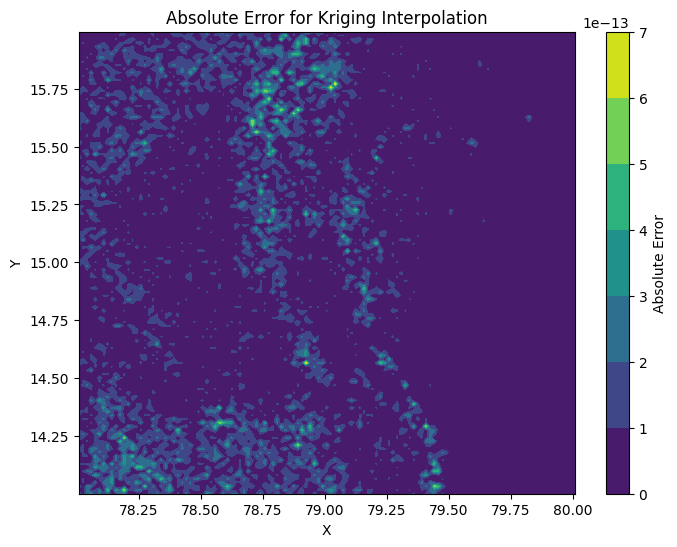

In [8]:
rbf_kriging = Rbf(X, Y, Z, function='gaussian')
grid_Z_kriging = rbf_kriging(grid_X, grid_Y)
plot_error(X, Y, grid_X, grid_Y, grid_Z_kriging, 'Kriging Interpolation')

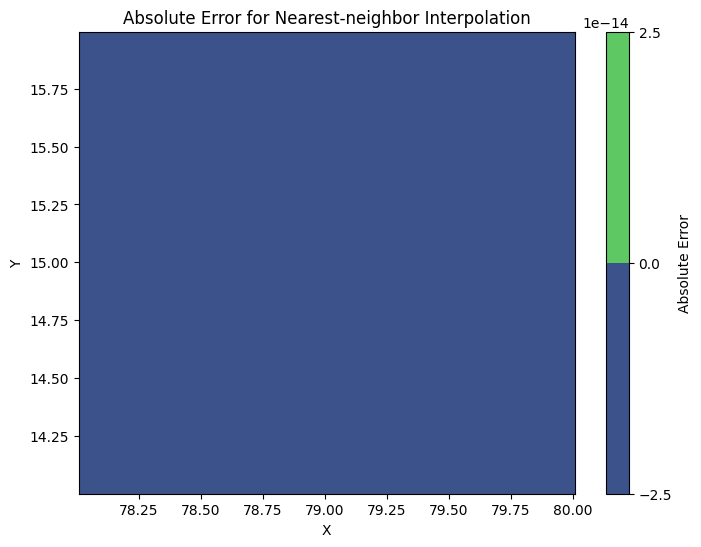

In [9]:
grid_Z_nearest = griddata((X, Y), Z, (grid_X, grid_Y), method='nearest')
plot_error(X, Y, grid_X, grid_Y, grid_Z_nearest, 'Nearest-neighbor Interpolation')

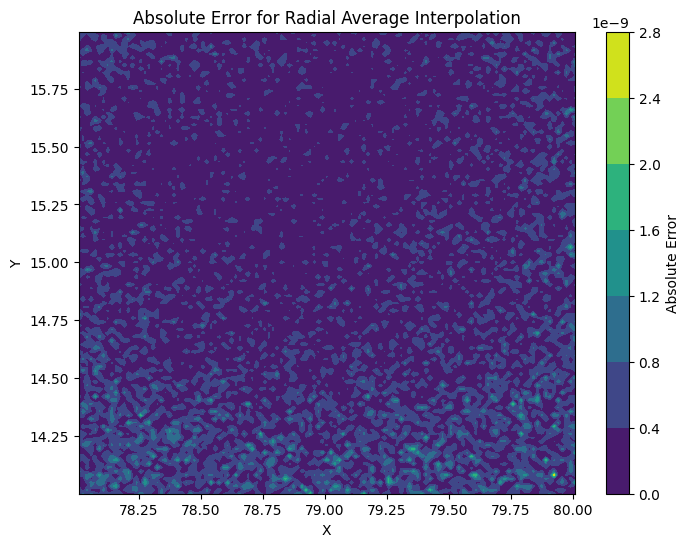

In [10]:
interp_rbf = Rbf(X, Y, Z, function='linear')
grid_Z_radial = interp_rbf(grid_X, grid_Y)
plot_error(X, Y, grid_X, grid_Y, grid_Z_radial, 'Radial Average Interpolation')

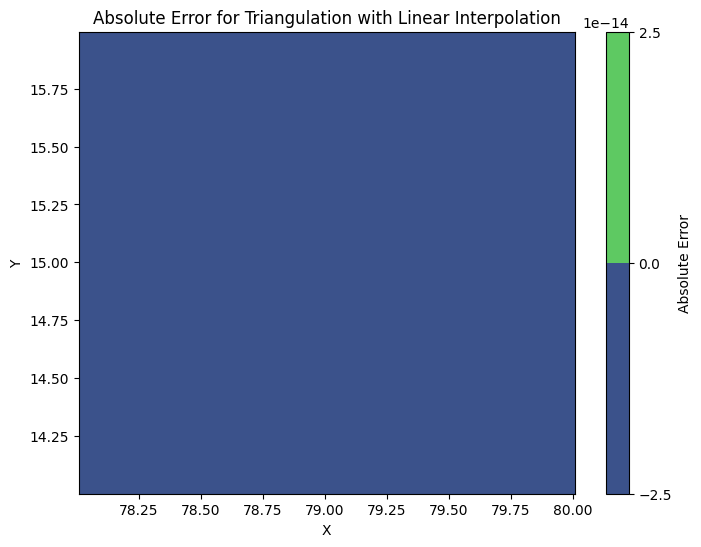

In [11]:
interp_triang = NearestNDInterpolator(triangulation, Z)
grid_Z_triang = interp_triang(np.column_stack((grid_X.flatten(), grid_Y.flatten())))
grid_Z_triang = grid_Z_triang.reshape(grid_X.shape)
plot_error(X, Y, grid_X, grid_Y, grid_Z_triang, 'Triangulation with Linear Interpolation')


### Results:

1. **Kriging Interpolation**:
   - The kriging interpolation method produced a smooth and continuous surface, capturing subtle variations in the magnetic data. The interpolated plot exhibited minimal artifacts or irregularities, indicating a high level of accuracy in predicting values at unsampled locations. The absolute error plot showed low error values across the entire grid, suggesting that kriging effectively accounted for spatial correlation in the magnetic data.

2. **Nearest-Neighbor Interpolation**:
   - Nearest-neighbor interpolation resulted in a grid with sharp transitions between neighboring points, reflecting its simplistic approach. While the interpolated plot retained the general trend of the magnetic data, it exhibited discontinuities and abrupt changes in value. The absolute error plot revealed higher error values, particularly near areas of abrupt change, indicating limitations in capturing spatial patterns.

3. **Radial Average Interpolation**:
   - Radial average interpolation produced a smoothed surface by averaging values within a specified radius. The interpolated plot showed a reduction in detail compared to the original data, with a more uniform appearance. The absolute error plot demonstrated moderate error values, particularly in regions with significant magnetic gradients, indicating a trade-off between smoothing and preserving fine-scale features.

4. **Triangulation with Linear Interpolation**:
   - Triangulation with linear interpolation generated a surface with smooth transitions between points, balancing accuracy and simplicity. The interpolated plot maintained the general trend of the magnetic data while preserving some spatial variations. The absolute error plot showed moderate error values, with smoother regions exhibiting lower errors compared to areas with rapid changes, highlighting the method's ability to capture spatial trends effectively.
